1. Objective

The goal of this task is to build a regression model that predicts house prices based on features such as:

Square footage

Number of bedrooms

Number of bathrooms

Location (encoded numerically)

We will preprocess the dataset, train a regression model, evaluate it using MAE and RMSE, and visualize actual vs predicted prices.

In [ ]:
# Import All Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Load dataset (using our files)
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Key features: size, bedrooms, location
features = ["GrLivArea", "BedroomAbvGr", "Neighborhood", "MSZoning"]
# Target variable
target = "SalePrice"

In [ ]:
# Remove rows with missing values in selected columns
df = train_df[features + [target]].dropna()

# Assigning Features in 'X' and Target in 'Y'
X = df[features]
y = df[target]

In [ ]:
# Preprocessing
#    - Scale numerical features
#    - One-hot encode categorical features
num_features = ["GrLivArea", "BedroomAbvGr"]
cat_features = ["Neighborhood", "MSZoning"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

In [10]:
# 4. Split data
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
"""
    Builds machine learning pipelines:
    - Linear Regression
    - Gradient Boosting Regressor
    """

model_lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

model_gb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])


In [ ]:
# Train the model using fit function

model_lr.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Prediction
pred_lr = model_lr.predict(X_test)
pred_gb = model_gb.predict(X_test)


In [ ]:
# Evaluate Models
def evaluate(pred, name):
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"📌 {name}")
    print(f"MAE  = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}\n")

evaluate(pred_lr, "Linear Regression")
evaluate(pred_gb, "Gradient Boosting")

📌 Linear Regression
MAE  = 26848.70
RMSE = 41362.68

📌 Gradient Boosting
MAE  = 24358.96
RMSE = 35970.60



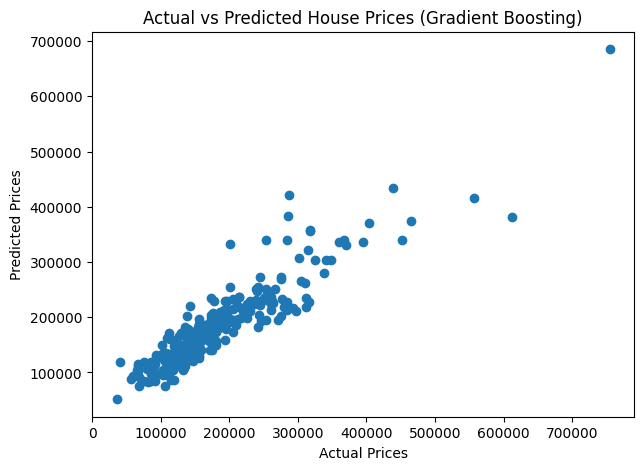

In [ ]:
# Plotting and Graph

plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_gb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Gradient Boosting)")
plt.show()
